In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:

load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'dirt')
fabric = ctrl.Antecedent(np.arange(0, 101, 1), 'fabric')


wash_time = ctrl.Consequent(np.arange(0, 101, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 101, 1), 'water_level')


In [ ]:

load['small'] = fuzz.trimf(load.universe, [0, 0, 40])
load['medium'] = fuzz.trimf(load.universe, [30, 55, 80])
load['large'] = fuzz.trimf(load.universe, [60, 100, 100])

dirt['low'] = fuzz.trimf(dirt.universe, [0, 0, 40])
dirt['medium'] = fuzz.trimf(dirt.universe, [30, 55, 80])
dirt['high'] = fuzz.trimf(dirt.universe, [60, 100, 100])

fabric['delicate'] = fuzz.trimf(fabric.universe, [0, 0, 40])
fabric['normal'] = fuzz.trimf(fabric.universe, [30, 55, 80])
fabric['heavy'] = fuzz.trimf(fabric.universe, [60, 100, 100])

wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 40])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [30, 55, 80])
wash_time['long'] = fuzz.trimf(wash_time.universe, [60, 100, 100])

water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 40])
water_level['medium'] = fuzz.trimf(water_level.universe, [30, 55, 80])
water_level['high'] = fuzz.trimf(water_level.universe, [60, 100, 100])


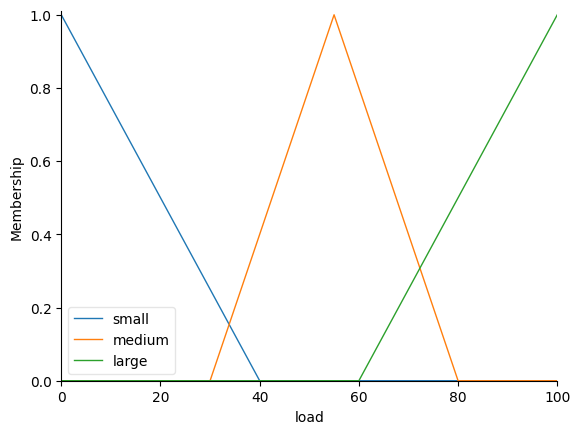

In [ ]:
load.view()

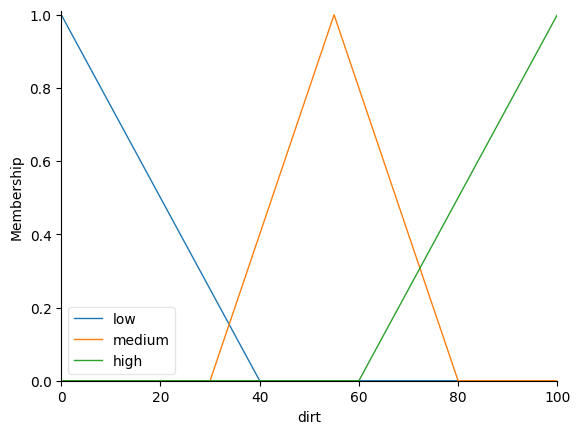

In [ ]:
dirt.view()

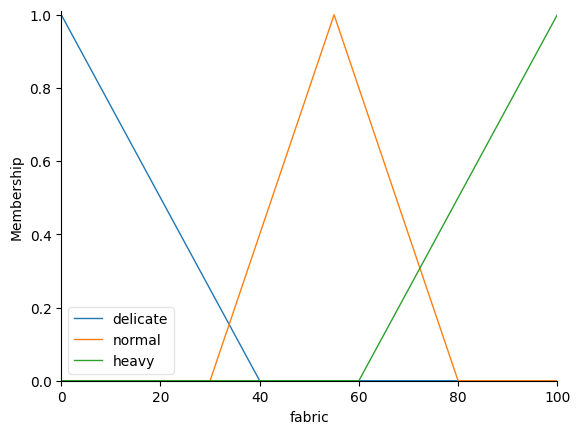

In [ ]:
fabric.view()

In [ ]:

rule1 = ctrl.Rule(load['small'] & dirt['low'], (wash_time['short'], water_level['low']))
rule2 = ctrl.Rule(load['small'] & dirt['medium'], (wash_time['medium'], water_level['medium']))
rule3 = ctrl.Rule(load['small'] & dirt['high'], (wash_time['long'], water_level['medium']))

rule4 = ctrl.Rule(load['medium'] & dirt['low'], (wash_time['medium'], water_level['medium']))
rule5 = ctrl.Rule(load['medium'] & dirt['medium'], (wash_time['long'], water_level['medium']))
rule6 = ctrl.Rule(load['medium'] & dirt['high'], (wash_time['long'], water_level['high']))

rule7 = ctrl.Rule(load['large'] & dirt['low'], (wash_time['medium'], water_level['high']))
rule8 = ctrl.Rule(load['large'] & dirt['medium'], (wash_time['long'], water_level['high']))
rule9 = ctrl.Rule(load['large'] & dirt['high'], (wash_time['long'], water_level['high']))

rule10 = ctrl.Rule(fabric['delicate'], (wash_time['short'], water_level['low']))
rule11 = ctrl.Rule(fabric['normal'], (wash_time['medium'], water_level['medium']))
rule12 = ctrl.Rule(fabric['heavy'], (wash_time['long'], water_level['high']))


In [ ]:
wash_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
washing = ctrl.ControlSystemSimulation(wash_ctrl)

In [ ]:

washing.input['load'] = 70
washing.input['dirt'] = 50
washing.input['fabric'] = 40

washing.compute()
print(f"Wash Time: {washing.output['wash_time']}")
print(f"Water Level: {washing.output['water_level']}")

Wash Time: 67.37984194843898
Water Level: 63.858082778670294
